 ## Investigating the Correlation between GDP and Life Expectancy

__Goals__: 

This project aims to analyse the Gross Domestic Product (GDP) and life expectancy statistics to see whether there is a correlation or pattern between a nation's economic wealth (as measured by GDP) and its population's life expectancy. The findings will provide evidence to support the view that an unfair relationship exists between a country's riches and its people's well-being.

__Data Sources__:

* GDP Data: The World Bank's national accounts data and OECD National Accounts data files. ([World Bank GDP Data](https://data.worldbank.org/indicator/NY.GDP.MKTP.CD))
* Life Expectancy Data: The World Health Organization's data repository. ([WHO Life Expectancy Data](vhttp://apps.who.int/gho/data/node.main.688))
* The data was compiled in one file, "all_data", to make the analysis easier.

__Analysis__: 

To conduct an exploratory data analysis (EDA) for this project, we will:
* Preprocess the data by cleaning and organising it for analysis.
* Calculate relevant statistical measures such as means, medians, and standard deviations for GDP and life expectancy.
* Visualise the data using plots, such as scatter plots, line graphs, or bar charts, to observe any patterns or trends between GDP and life expectancy.
* Conduct correlation analysis to determine the strength and direction of the relationship between GDP and life expectancy.
* Interpret the findings and conclude the presence or absence of a correlation between GDP and life expectancy.


By following these steps, we aim to provide empirical evidence to support the Vice President of Intuition and Systems at IHEAL's claim regarding the correlation or pattern between a nation's GDP and the life expectancy of its people.

### 1. Importing Libraries
For this project the following packages will be used:
* `Pandas`
* `Matplotlib`
* `Seaborn`

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

### 2. Loading Data
Loading the data and quickly inspecting it.

In [18]:
df = pd.read_csv('/kaggle/input/gdp-dataset-for-learning-visualization/gdp_data.csv')
df.head()

,Country,Year,Life expectancy at birth (years),GDP
0,Chile,2000,77.3,7.786093e+10
1,Chile,2001,77.3,7.097992e+10
2,Chile,2002,77.8,6.973681e+10
3,Chile,2003,77.9,7.564346e+10
4,Chile,2004,78.0,9.921039e+10


In [3]:
df.shape

(96, 4)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 4 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Country                           96 non-null     object 
 1   Year                              96 non-null     int64  
 2   Life expectancy at birth (years)  96 non-null     float64
 3   GDP                               96 non-null     float64
dtypes: float64(2), int64(1), object(1)
memory usage: 3.1+ KB


In [5]:
df.describe()

,Year,Life expectancy at birth (years),GDP
count,96.000000,96.000000,9.600000e+01
mean,2007.500000,72.789583,3.880499e+12
std,4.633971,10.672882,5.197561e+12
min,2000.000000,44.300000,4.415703e+09
25%,2003.750000,74.475000,1.733018e+11
50%,2007.500000,76.750000,1.280220e+12
75%,2011.250000,78.900000,4.067510e+12
max,2015.000000,81.000000,1.810000e+13


### 3. Analysing Data

We start by creating a helper function that will help in displaying distinct values of a given column.

In [6]:
# Helper function to display unique values of a serie
def show_distinct(serie):
    for item in list(serie.unique()):
        print(item)

The countries represented in the data are:

In [7]:
show_distinct(df['Country'])

Chile
China
Germany
Mexico
United States of America
Zimbabwe


The years represented in the data are:

In [8]:
show_distinct(df['Year'])

2000
2001
2002
2003
2004
2005
2006
2007
2008
2009
2010
2011
2012
2013
2014
2015


The 'Life Expectancy at Birth (year)' column is too long of a name so we will rename it for the sake of convinience to the acronym LEABY.

In [9]:
# Renaming the column
df.rename(columns={'Life expectancy at birth (years)': 'LEABY',}, inplace=True)
df.head()

,Country,Year,LEABY,GDP
0,Chile,2000,77.3,7.786093e+10
1,Chile,2001,77.3,7.097992e+10
2,Chile,2002,77.8,6.973681e+10
3,Chile,2003,77.9,7.564346e+10
4,Chile,2004,78.0,9.921039e+10


We start by displaying visualising the evolution of the GDP and the life expectancy for the different countries over the set time period.

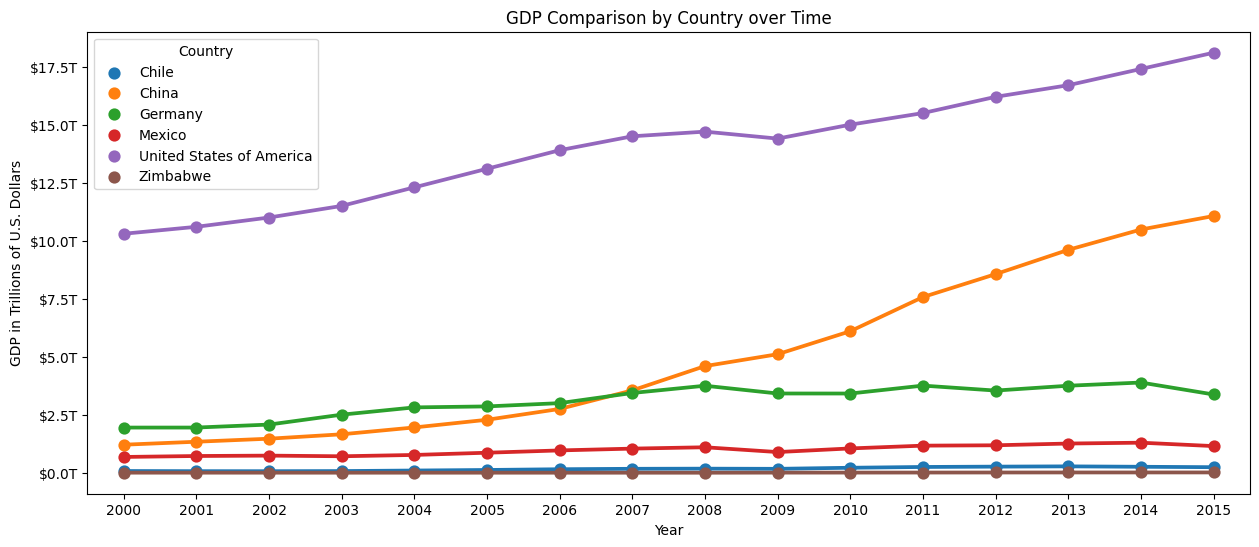

In [10]:
## GDP comparison
from matplotlib.ticker import FuncFormatter

# Function to format the y label
def trillions(x, pos):
    'The two args are the value and tick position'
    return '$%1.1fT' % (x*1e-12)

formatter = FuncFormatter(trillions)

# Set the figure size
f, ax = plt.subplots(figsize=(15, 6))

# Create a point plot
ax =sns.pointplot(x="Year", y="GDP", hue="Country", data=df)
ax.yaxis.set_major_formatter(formatter)
ax.set_title("GDP Comparison by Country over Time")
ax.set_ylabel("GDP in Trillions of U.S. Dollars")

# Display the plot
plt.show()

From the plot above, we can observe a few tendencies within the time frame from 2000 to 2015:
* United States and China saw their GDP skyrocket, respectively, going from $10 trillion to $17.5 trillion and $1 trillion to $10 trillion
* Although the are some movements, it is only after 2008 that we see the most changes in the data as all countries are affected.
* However, Zimbabwe's GDP remains unchanged.

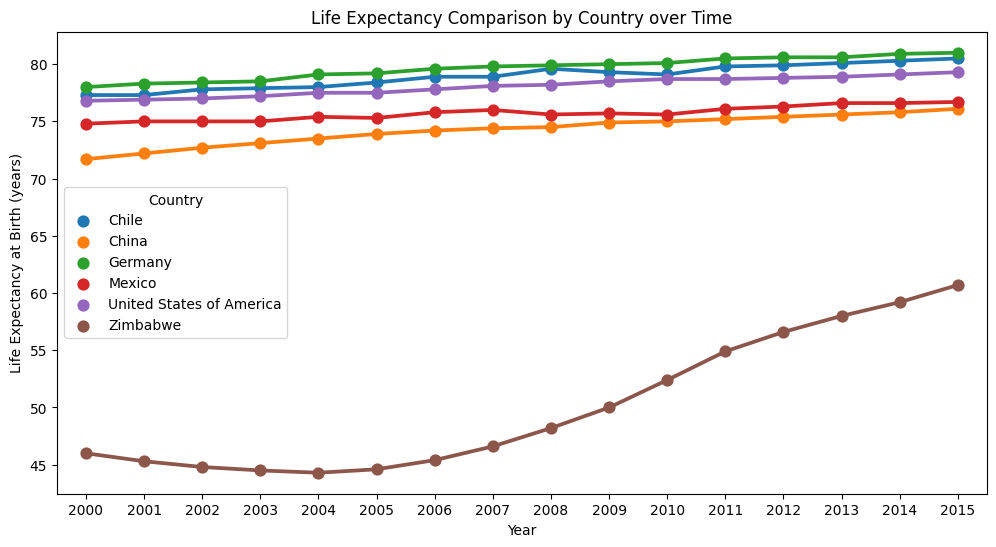

In [11]:
## Examining Life Expectancy over years
# Set the figure size
f, ax = plt.subplots(figsize=(12, 6))

# Create a point plot
ax =sns.pointplot(x="Year", y="LEABY", hue="Country", data=df)
ax.set_title("Life Expectancy Comparison by Country over Time")
ax.set(ylabel="Life Expectancy at Birth (years)")

# Display the plot
plt.show()

Although there are some changes observed over the years, the most noticeable one is from Zimbabwe

In [12]:
# Average life expectancy for each country
average_leaby = df.groupby('Country')['LEABY'].mean().sort_values(ascending=False)
average_leaby


Country
Germany                     79.65625
Chile                       78.94375
United States of America    78.06250
Mexico                      75.71875
China                       74.26250
Zimbabwe                    50.09375
Name: LEABY, dtype: float64

The average life expectancy exceeds 70 years except for Zimbabwe. This can be explain with the decrease that happened between 2000 and 2005.

#### Distribution of Life Expectancy

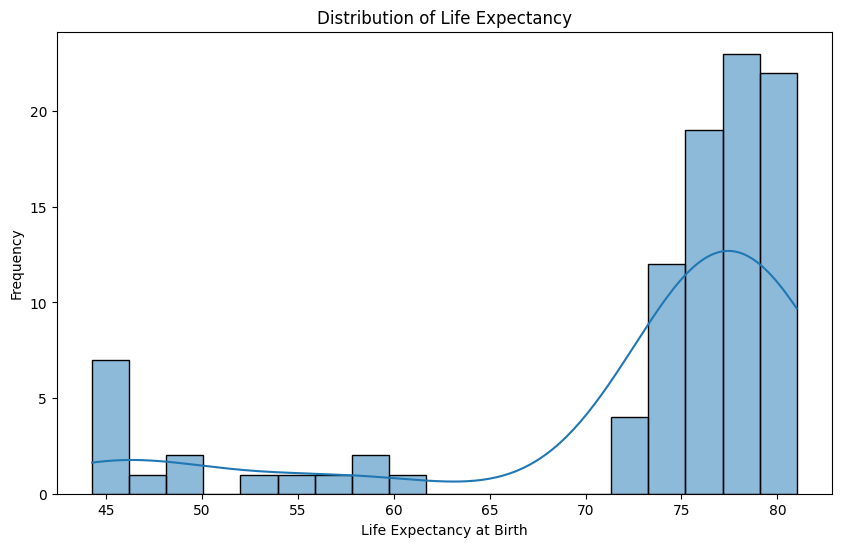

In [13]:
# Plot the distribution of life expectancy using a histogram
plt.figure(figsize=(10, 6))
sns.histplot(df['LEABY'], kde=True)
plt.xlabel('Life Expectancy at Birth')
plt.ylabel('Frequency')
plt.title('Distribution of Life Expectancy')
plt.show()

### Correlation

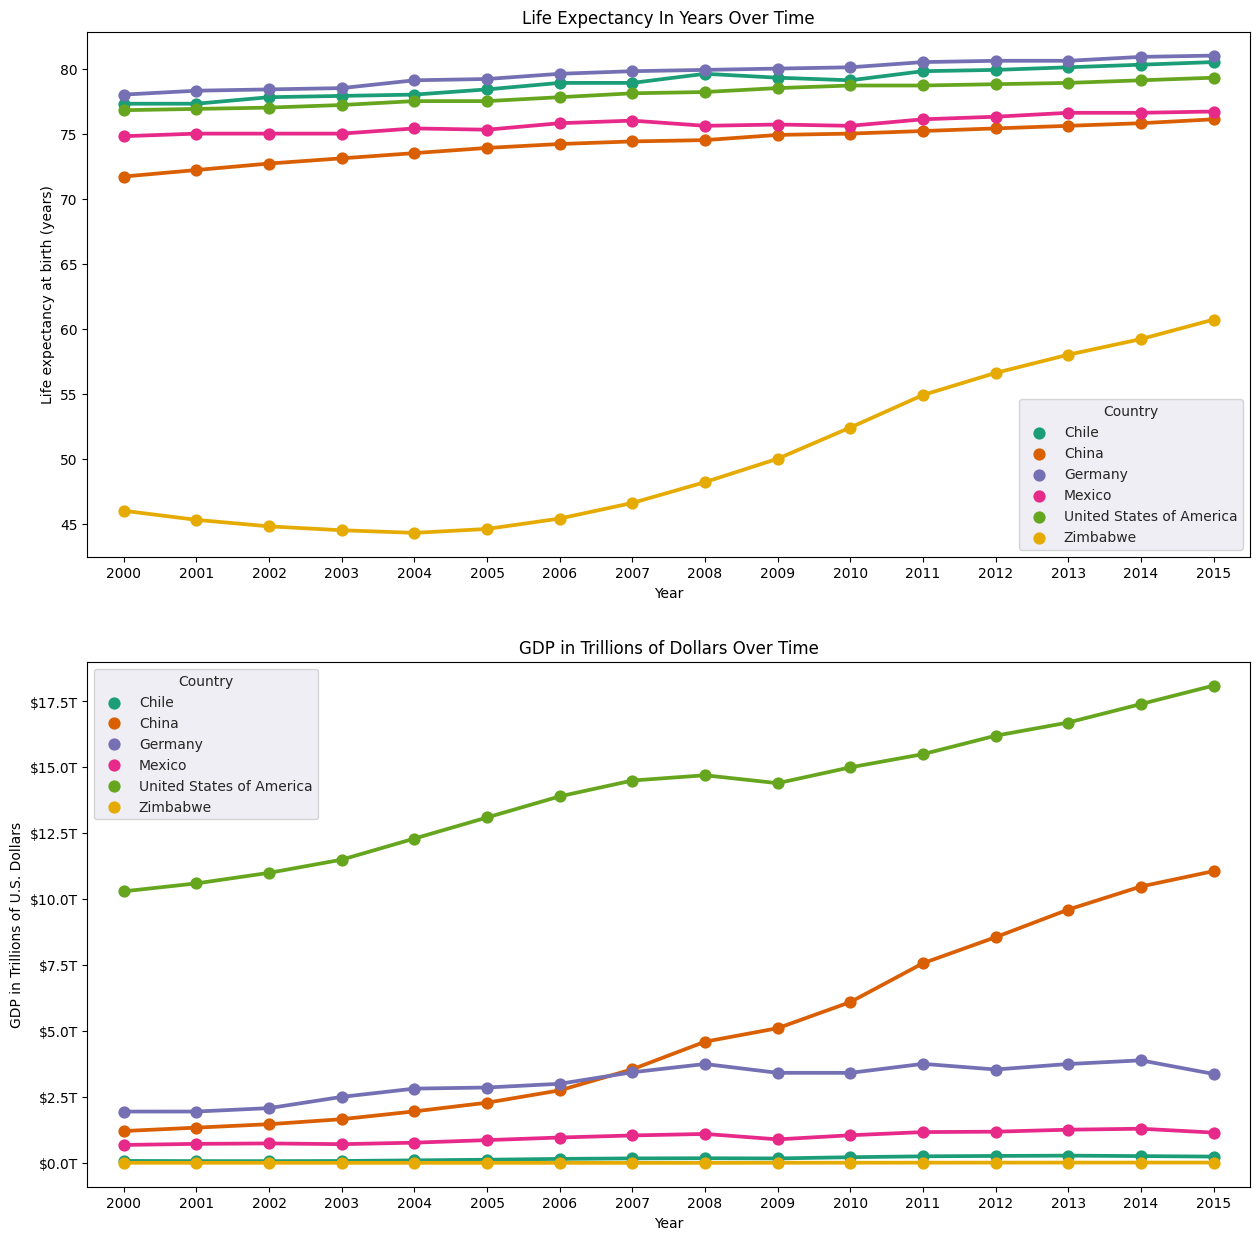

In [14]:
# Set the figure size
f, (ax1, ax2) = plt.subplots(2, 1, figsize=(15, 15))


# Create point plots
sns.set_style("dark")
sns.set_palette("Dark2")
ax1 = sns.pointplot(x="Year", y="LEABY", hue = "Country", data=df, ax=ax1)
ax2 = sns.pointplot(x="Year", y="GDP", hue = "Country", data=df, ax=ax2)
ax2.yaxis.set_major_formatter(formatter)
ax1.set(ylabel="Life expectancy at birth (years)")
ax2.set(ylabel="GDP in Trillions of U.S. Dollars")
ax2.set_title("GDP in Trillions of Dollars Over Time")
ax1.set_title("Life Expectancy In Years Over Time")

# Display plot
plt.show()

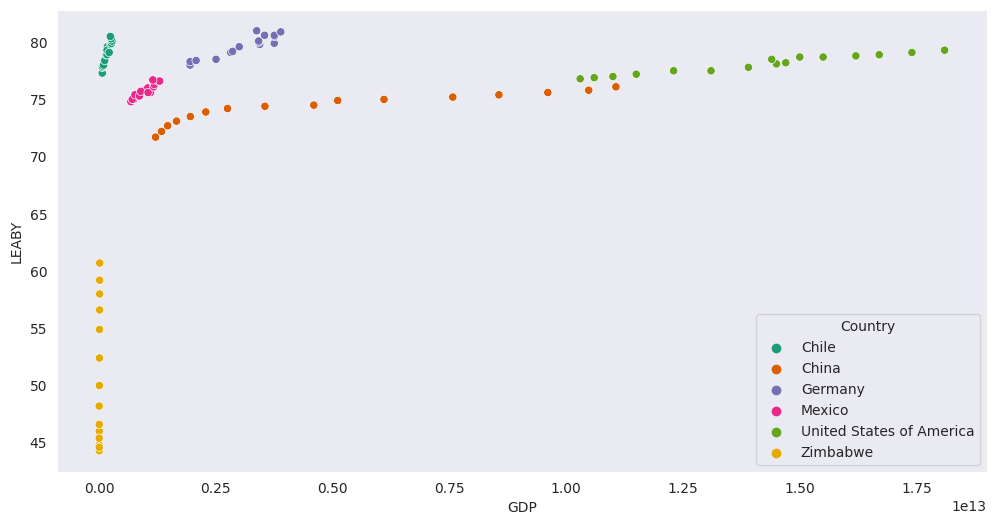

In [15]:
# Create scatter plot
f, ax3 = plt.subplots(figsize=(12, 6))

ax3 = sns.scatterplot(x='GDP', y='LEABY', hue='Country', data=df)

plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/tmp/ipykernel_32/496343626.py:10: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


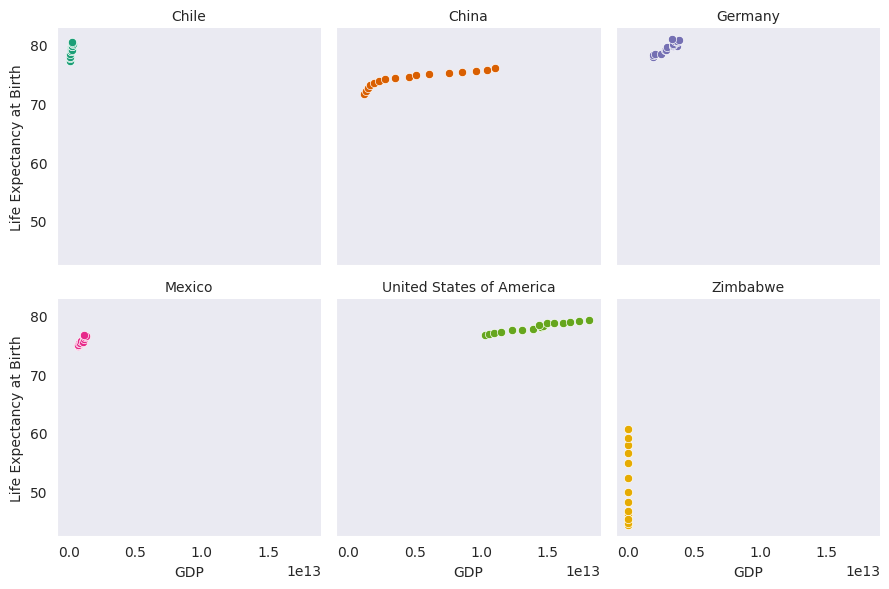

In [16]:
# Create scatter plot
g = sns.FacetGrid(df, col='Country', col_wrap=3, height=3, hue='Country')
g.map(sns.scatterplot, 'GDP', 'LEABY')

# Set titles and labels
g.set_titles('{col_name}')
g.set_axis_labels('GDP', 'Life Expectancy at Birth')

# Adjust spacing between subplots
plt.tight_layout()

# Display the plots
plt.show()

In [17]:
# Calculate correlation for each country
correlations = df.groupby('Country')[['GDP', 'LEABY']].corr().iloc[0::2, -1]

# Print correlation for each country
for country, correlation in correlations.items():
    print(f"Correlation for {country}: {correlation:.2f}")

Correlation for ('Chile', 'GDP'): 0.95
Correlation for ('China', 'GDP'): 0.91
Correlation for ('Germany', 'GDP'): 0.93
Correlation for ('Mexico', 'GDP'): 0.93
Correlation for ('United States of America', 'GDP'): 0.98
Correlation for ('Zimbabwe', 'GDP'): 0.97


We can see that the is a positive correlation between GDP and life expectancy for each country except Zimbabwe where we observe an amelioration of the life expectancy only.

### 4. Conclusion

Based on our analysis, we have found the following:

The findings indicate a significant positive correlation between a country's GDP and life expectancy. Countries with higher GDP tend to have higher life expectancies on average. However, it is essential to note that correlation does not imply causation. Other factors like healthcare systems, education, social policies, and living conditions can also influence life expectancy.

It is worth mentioning that while a correlation exists, the Vice President of Intuition and Systems at IHEAL's claim about an "unjust connection" between wealth and well-being requires further investigation. The complex relationship between socioeconomic factors and population health necessitates a nuanced understanding beyond a simple correlation.

In conclusion, our analysis provides compelling evidence supporting the existence of a correlation between GDP and life expectancy. This information can be instrumental in driving discussions and policies to improve individuals' well-being within different nations. However, it is vital to approach the subject with a holistic perspective, considering multiple factors that contribute to a population's health and well-being.